# Analysis of the dataset : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [2]:
import pickle
folder_name = 'data/'
df_objectives = pickle.load(open(folder_name+'df_objectives.p','rb'))
df_offers = pickle.load(open(folder_name+'df_offers.p','rb'))
df_members = pickle.load(open(folder_name+'df_members.p','rb'))
df_information = pickle.load(open(folder_name+'df_information.p','rb'))
df_functions = pickle.load(open(folder_name+'df_functions.p','rb'))
df_activities = pickle.load(open(folder_name+'df_activities.p','rb'))

df_objectives.dropna( subset=['objectives'],inplace=True)


## Analysis and regression over the df_consumer_behavior :

In [3]:
df_consumer_behavior = pickle.load(open('df_consumer_behavior.p','rb'))

,id,text_name,facebook_follower,facebook_likes,instagram_followers,instagram_publication,status,count_activities
0,0,Les_Éphémères,NaN,NaN,NaN,NaN,Association,2.0
1,1,NaN,NaN,NaN,NaN,NaN,Association,1.0
2,2,Le_Bureau_des_Spectacles,NaN,NaN,NaN,NaN,SAS,NaN
3,3,Billy_Society_Production,95.0,76.0,NaN,NaN,,4.0
4,4,Ginger_Kick_Events,NaN,NaN,NaN,NaN,Association,1.0



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     169 non-null    int64  
 1   text_name              133 non-null    object 
 2   facebook_follower      64 non-null     float64
 3   facebook_likes         55 non-null     float64
 4   instagram_followers    4 non-null      float64
 5   instagram_publication  3 non-null      float64
 6   status                 169 non-null    object 
 7   count_activities       154 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.7+ KB

Statistiques descriptives :


,id,facebook_follower,facebook_likes,instagram_followers,instagram_publication,count_activities
count,169.000000,64.000000,55.000000,4.000000,3.000000,154.000000
mean,84.000000,2119.437500,2168.909091,1010.750000,89.333333,4.207792
std,48.930222,2566.994122,2601.249751,1364.840253,97.166524,8.142261
min,0.000000,58.000000,48.000000,70.000000,18.000000,1.000000
25%,42.000000,478.500000,405.500000,147.250000,34.000000,1.000000
50%,84.000000,1150.000000,1200.000000,486.500000,50.000000,1.000000
75%,126.000000,2825.000000,3250.000000,1350.000000,125.000000,4.000000
max,168.000000,13000.000000,12000.000000,3000.000000,200.000000,71.000000



Valeurs manquantes :


id                         0
text_name                 36
facebook_follower        105
facebook_likes           114
instagram_followers      165
instagram_publication    166
status                     0
count_activities          15
dtype: int64

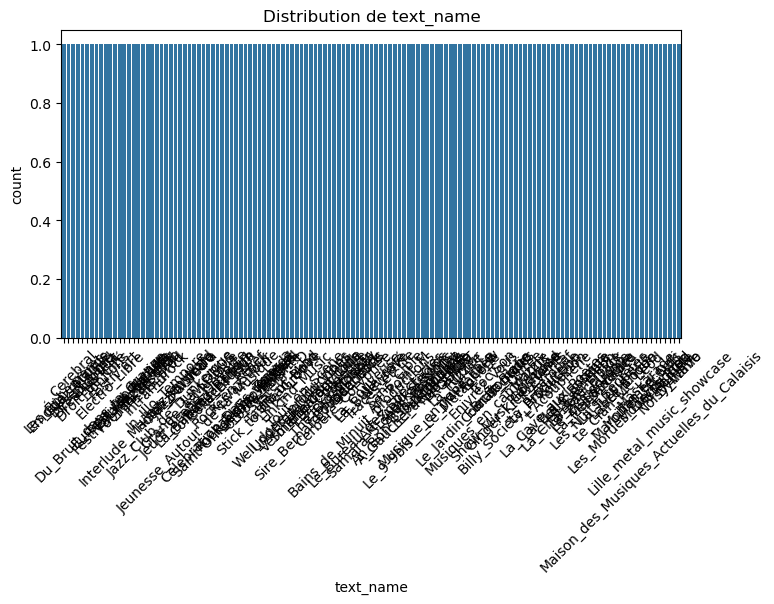

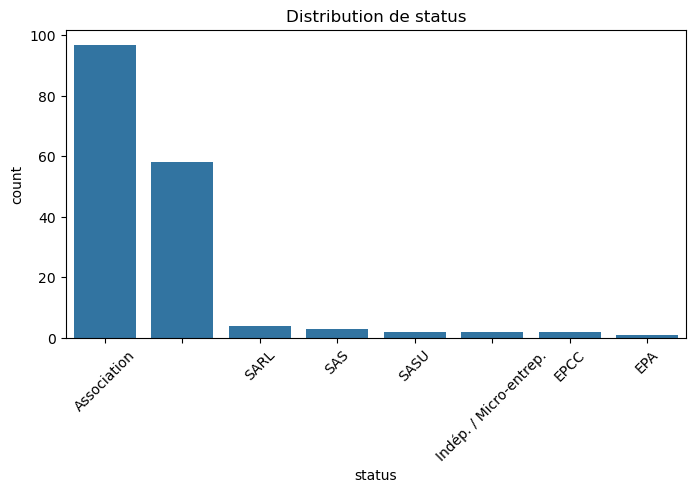

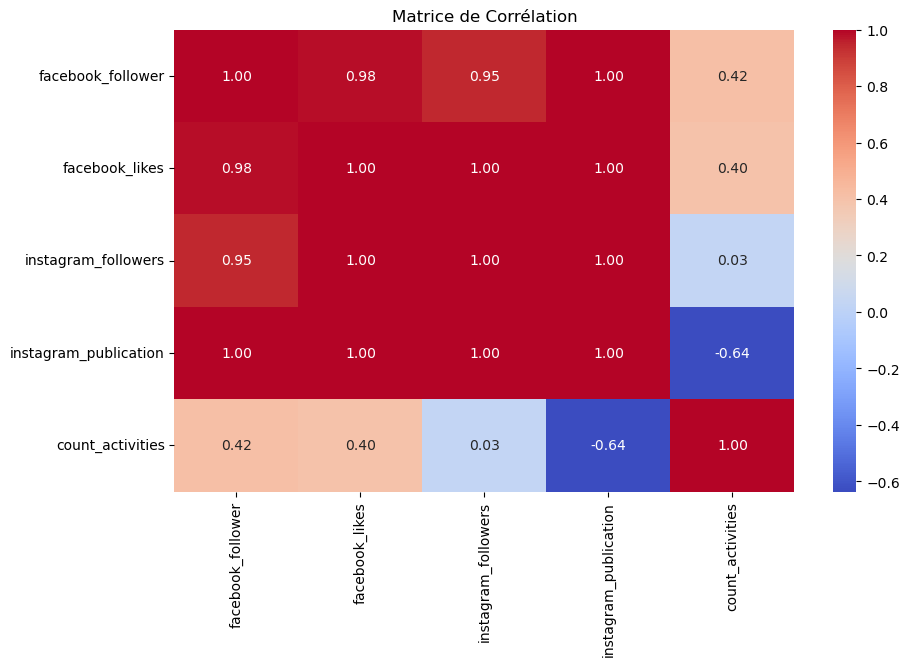

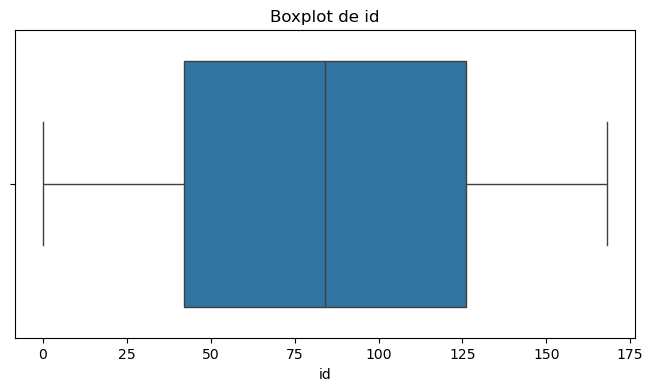

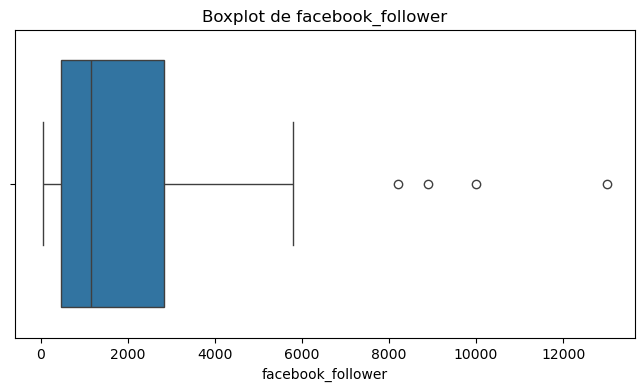

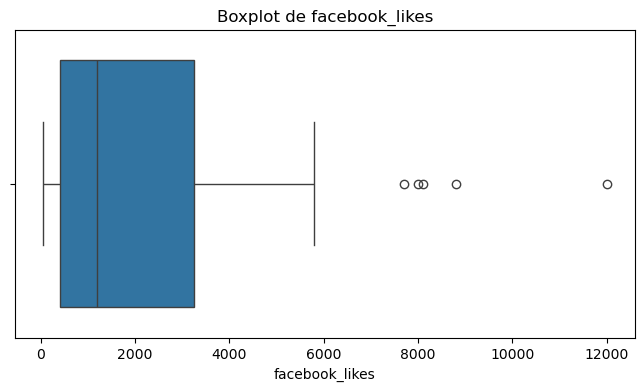

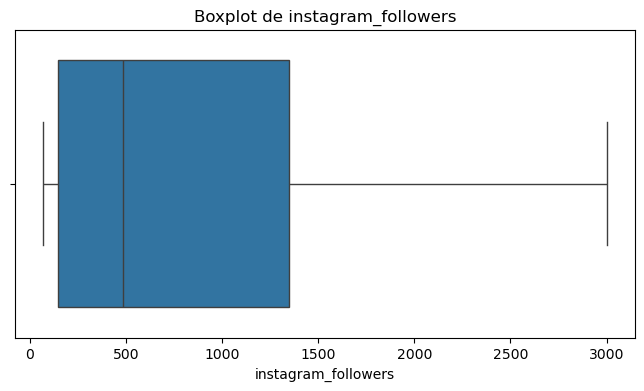

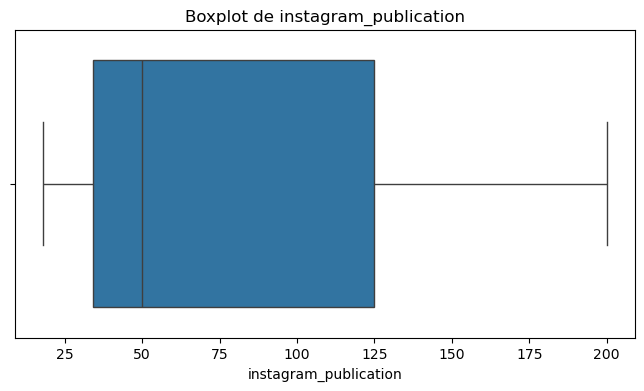

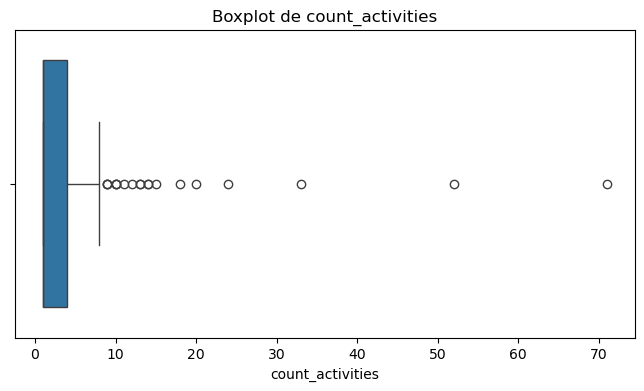

In [11]:
# Aperçu des données
display(df_consumer_behavior.head())
print("\nInformations générales :")
df_consumer_behavior.info()
print("\nStatistiques descriptives :")
display(df_consumer_behavior.describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
display( df_consumer_behavior.isnull().sum() )

# Analyse des variables catégorielles
cat_cols = df_consumer_behavior.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_consumer_behavior[col], order=df_consumer_behavior[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {col}")
    plt.show()

    # Analyse des relations entre variables (corrélation pour les numériques)
plt.figure(figsize=(10, 6))
sns.heatmap(df_consumer_behavior[['facebook_follower'	,'facebook_likes'	,'instagram_followers'	,'instagram_publication','count_activities']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()

# Détection des valeurs aberrantes
num_cols = df_consumer_behavior.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_consumer_behavior[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## Make a linear regression for predicting the number of participants :

In [5]:
df_activities.head()

,index,id,name,price
0,0,0,Le Cabaret des Bains,NaN
1,0,0,Le Cabaret des Bains,NaN
2,1,1,EFFET.MER Festival,NaN
3,2,2,NaN,NaN
4,2,2,NaN,NaN


In [6]:
df_consumer_behavior

,id,text_name,facebook_follower,facebook_likes,instagram_followers,instagram_publication,status,count_activities
0,0,Les_Éphémères,NaN,NaN,NaN,NaN,Association,2.0
1,1,NaN,NaN,NaN,NaN,NaN,Association,1.0
2,2,Le_Bureau_des_Spectacles,NaN,NaN,NaN,NaN,SAS,NaN
3,3,Billy_Society_Production,95.0,76.0,NaN,NaN,,4.0
4,4,Ginger_Kick_Events,NaN,NaN,NaN,NaN,Association,1.0
...,...,...,...,...,...,...,...,...
164,164,Rock_Aisne_festival,NaN,NaN,NaN,NaN,Association,NaN
165,165,Reivax_Tour,NaN,NaN,NaN,NaN,Association,3.0
166,166,Saint-Omer_Jaaz_festival,5000.0,8000.0,3000.0,200.0,EPCC,4.0
167,167,Rock_en_Stock,NaN,NaN,NaN,NaN,Association,9.0


In [8]:
df_offers.head()

,index,id,description,name,price,target_group
0,0,0,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN
2,2,2,Spectacles et concerts des principaux artistes...,Spectacles et concerts,NaN,Tout public
3,3,3,Concert featuring Dimimagery and Nakedsoftmen....,Dimimagery and Nakedsoftmen.band Concert,NaN,Music lovers
4,3,3,Concert featuring Dimimagery and Nakedsoftmen....,Dimimagery and Nakedsoftmen.band Concert,NaN,Music lovers


In [ ]:
df_objectives

In [9]:
None is None

True

In [10]:
df = pd.DataFrame({'a': [1,2]})

In [12]:
pd.concat([df,df])

,a
0,1
1,2
0,1
1,2
